In [2]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 11.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 11.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 11.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


# 1.Model 1: LSTM

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


Epoch 1/10


/Users/xxy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0457 - val_loss: 0.0209
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0340 - val_loss: 0.0212
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0295 - val_loss: 0.0287
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0281 - val_loss: 0.0255
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0280 - val_loss: 0.0222
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0243 - val_loss: 0.0228
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0262 - val_loss: 0.0239
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0233 - val_loss: 0.0226
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - val_loss: 0.0228
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0232 - val_loss: 0.0235
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


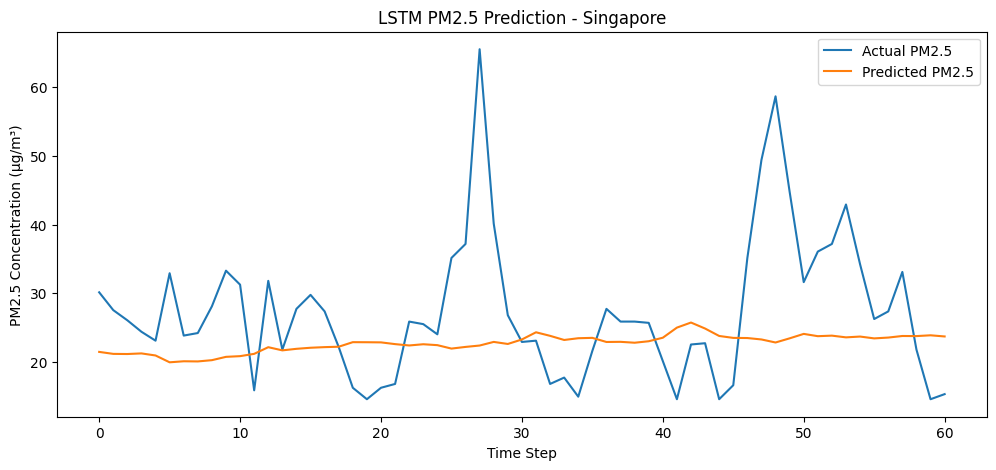

MAE: 8.28
RMSE: 11.35
MAPE: 28.76%


In [56]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Step 2: Read and sort data
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")

# Step 3: Select Singapore data and relevant features
df = df[df["location_name"].str.contains("Singapore", case=False)]
selected_cols = [
    "temperature_celsius", "humidity", "wind_kph", "precip_mm", "air_quality_PM2.5"
]
df = df[selected_cols].dropna()
df = df.tail(2000)  # use most recent 2000 records

# Step 4: Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Create time series sequences
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # all features except PM2.5
        y.append(data[i + sequence_length, -1])     # target: PM2.5
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=24)

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Define LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Predict and inverse transform
y_pred = model.predict(X_test)
pm25_index = selected_cols.index("air_quality_PM2.5")
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_index], scaler.scale_[pm25_index]
y_test_real = pm25_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = pm25_scaler.inverse_transform(y_pred)

# Step 10: Plot results
plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='Actual PM2.5')
plt.plot(y_pred_real, label='Predicted PM2.5')
plt.title("LSTM PM2.5 Prediction - Singapore")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 11: Output evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")




# Model 2: GRU

/Users/xxy/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1060 - val_loss: 0.0251
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - val_loss: 0.0242
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0344 - val_loss: 0.0192
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0246 - val_loss: 0.0243
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - val_loss: 0.0219
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - val_loss: 0.0193
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0230 - val_loss: 0.0198
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0237 - val_loss: 0.0201
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0289 - val_loss: 0.0213
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0236 - val_loss: 0.0199
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


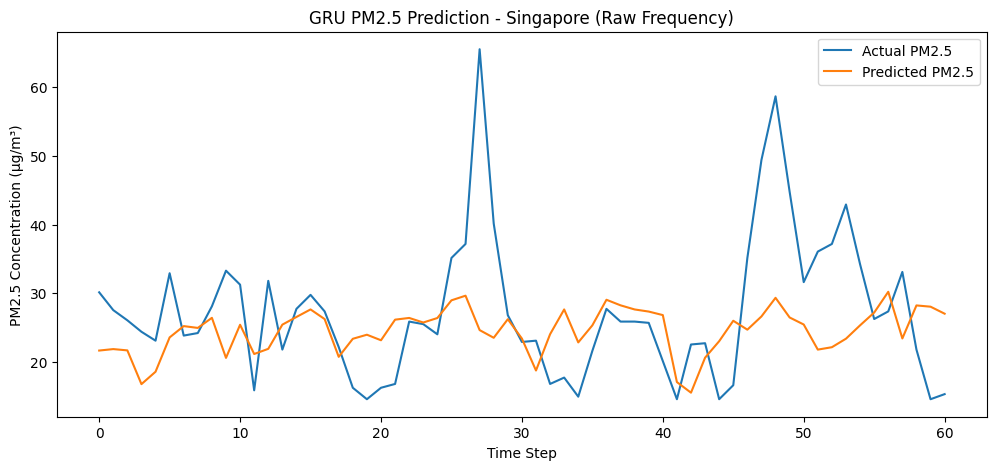

MAE: 7.55
RMSE: 10.46
MAPE: 27.54%


In [21]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Step 2: Load the original dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")

# Step 3: Filter Singapore data and select features
df = df[df["location_name"].str.contains("Singapore", case=False)]
selected_cols = [
    "temperature_celsius", "humidity", "wind_kph", "precip_mm", "air_quality_PM2.5"
]
df = df[selected_cols].dropna()
df = df.tail(10000)  # Limit to recent 10,000 records to avoid memory issues

# Step 4: Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Create sequences (use previous 24 records to predict next PM2.5)
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # All features except PM2.5
        y.append(data[i + sequence_length, -1])     # Target: PM2.5
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=24)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Define GRU model
model = Sequential()
model.add(GRU(units=32, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Make predictions and inverse transform PM2.5 values
y_pred = model.predict(X_test)
pm25_index = selected_cols.index("air_quality_PM2.5")
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_index], scaler.scale_[pm25_index]
y_test_real = pm25_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = pm25_scaler.inverse_transform(y_pred)

# Step 10: Visualization
plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='Actual PM2.5')
plt.plot(y_pred_real, label='Predicted PM2.5')
plt.title("GRU PM2.5 Prediction - Singapore (Raw Frequency)")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 11: Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Model 3: Transformer

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1346 - val_loss: 0.0854
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0540 - val_loss: 0.0367
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - val_loss: 0.0202
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0252 - val_loss: 0.0189
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0292 - val_loss: 0.0222
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0250 - val_loss: 0.0254
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0301 - val_loss: 0.0239
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0282 - val_loss: 0.0215
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - val_loss: 0.0224
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 - val_loss: 0.0238
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


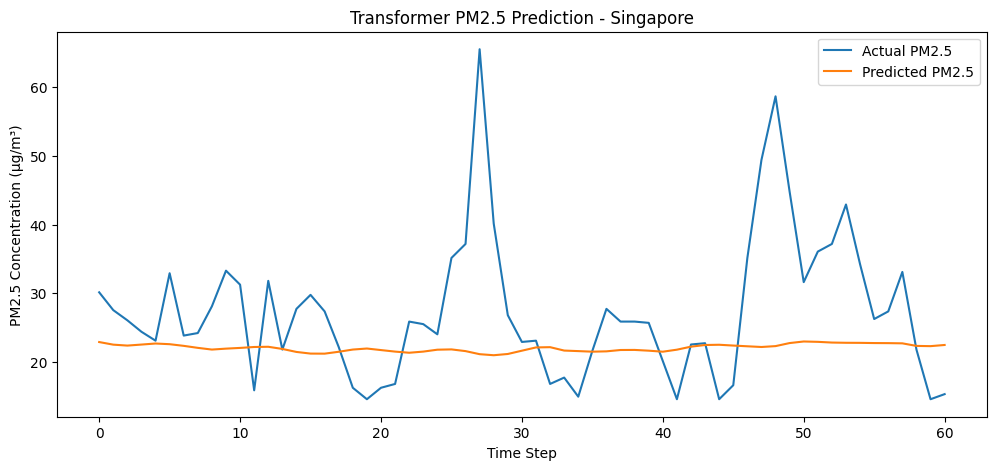

MAE: 8.00
RMSE: 11.44
MAPE: 26.61%


In [22]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 2: Load and preprocess the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")
df = df[df["location_name"].str.contains("Singapore", case=False)]

selected_cols = [
    "temperature_celsius", "humidity", "wind_kph", "precip_mm", "air_quality_PM2.5"
]
df = df[selected_cols].dropna()
df = df.tail(10000)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 3: Create time series sequences
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # input features
        y.append(data[i + sequence_length, -1])     # target: PM2.5
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=24)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Positional Encoding (optional)
class PositionalEncoding(layers.Layer):
    def __init__(self, sequence_length, d_model):
        super().__init__()
        self.pos_encoding = self.positional_encoding(sequence_length, d_model)

    def get_config(self):
        return {"sequence_length": self.pos_encoding.shape[0], "d_model": self.pos_encoding.shape[1]}

    def positional_encoding(self, seq_len, d_model):
        angles = np.arange(seq_len)[:, np.newaxis] / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
        angles[:, 0::2] = np.sin(angles[:, 0::2])
        angles[:, 1::2] = np.cos(angles[:, 1::2])
        return tf.cast(angles[np.newaxis, ...], dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# Step 6: Build Transformer model
def build_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = PositionalEncoding(input_shape[0], input_shape[1])(inputs)
    x = layers.MultiHeadAttention(num_heads=4, key_dim=input_shape[1])(x, x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation="relu")(x)
    outputs = layers.Dense(1)(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(loss="mse", optimizer="adam")
    return model

model = build_transformer_model(X.shape[1:])

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 8: Prediction & inverse transform
y_pred = model.predict(X_test)
pm25_index = selected_cols.index("air_quality_PM2.5")
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_index], scaler.scale_[pm25_index]
y_test_real = pm25_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = pm25_scaler.inverse_transform(y_pred)

# Step 9: Visualization
plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='Actual PM2.5')
plt.plot(y_pred_real, label='Predicted PM2.5')
plt.title("Transformer PM2.5 Prediction - Singapore")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 10: Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Model 4: TCN


In [23]:
pip install tensorflow-addons


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 10.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [30]:
from tensorflow.keras.layers import Input, Conv1D, LayerNormalization, ReLU, Add, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model

def residual_block(x, filters, kernel_size, dilation_rate):
    prev_x = x
    x = Conv1D(filters, kernel_size, padding="causal", dilation_rate=dilation_rate)(x)
    x = LayerNormalization()(x)
    x = ReLU()(x)
    x = Conv1D(filters, kernel_size, padding="causal", dilation_rate=dilation_rate)(x)
    x = LayerNormalization()(x)
    x = Add()([x, prev_x])
    return ReLU()(x)

def build_custom_tcn_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv1D(32, kernel_size=3, padding="causal")(inputs)
    x = residual_block(x, 32, 3, 1)
    x = residual_block(x, 32, 3, 2)
    x = residual_block(x, 32, 3, 4)
    x = GlobalAveragePooling1D()(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1422 - val_loss: 0.0354
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - val_loss: 0.0276
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - val_loss: 0.0284
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271 - val_loss: 0.0230
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - val_loss: 0.0229
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0261 - val_loss: 0.0365
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - val_loss: 0.0365
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - val_loss: 0.0315
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0261 - val_loss: 0.0225
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0237 - val_loss: 0.0238
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


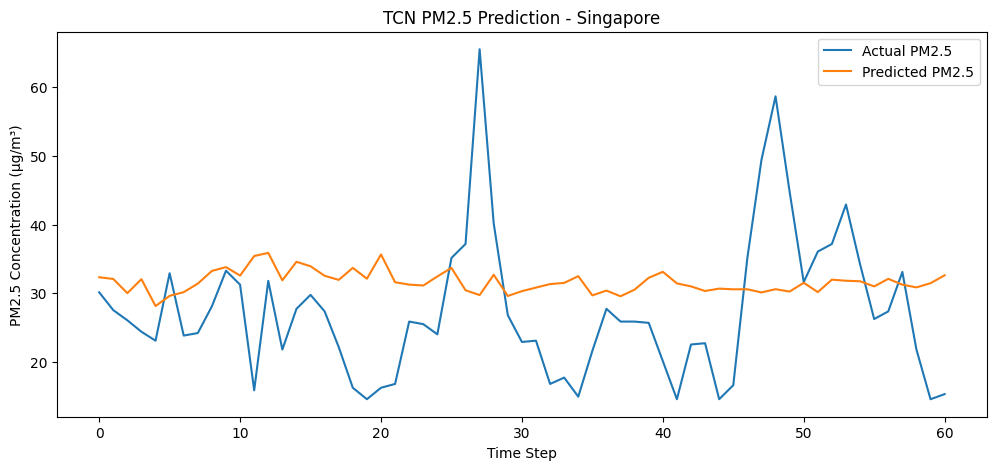

MAE: 9.14
RMSE: 11.42
MAPE: 40.70%


In [ ]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, LayerNormalization, ReLU, Add, Dense, GlobalAveragePooling1D



# Step 2: Load and preprocess the dataset
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")

# Step 3: Filter Singapore data and select features
df = df[df["location_name"].str.contains("Singapore", case=False)]
selected_cols = [
    "temperature_celsius", "humidity", "wind_kph", "precip_mm", "air_quality_PM2.5"
]
df = df[selected_cols].dropna()
df = df.tail(10000)  # limit to avoid memory overload

# Step 4: Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 5: Create sequences (24 timesteps)
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])
        y.append(data[i + sequence_length, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=24)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 7: Define TCN model
model = build_custom_tcn_model(input_shape=X.shape[1:])


# Step 8: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 9: Prediction and inverse transform
y_pred = model.predict(X_test)
pm25_index = selected_cols.index("air_quality_PM2.5")
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_index], scaler.scale_[pm25_index]
y_test_real = pm25_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = pm25_scaler.inverse_transform(y_pred)

# Step 10: Visualization
plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='Actual PM2.5')
plt.plot(y_pred_real, label='Predicted PM2.5')
plt.title("TCN PM2.5 Prediction - Singapore")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 11: Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Model 5: N-BEATS

In [36]:
pip install protobuf>=3.20.3,<4.0.0 --upgrade


zsh:1: 3.20.3, not found
Note: you may need to restart the kernel to use updated packages.


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [38]:
def nbeats_block(input_tensor, units=128, n_layers=4):
    x = input_tensor
    for _ in range(n_layers):
        x = Dense(units, activation='relu')(x)
    backcast = Dense(input_tensor.shape[-1])(x)  # input dimension for residual
    forecast = Dense(1)(x)
    return backcast, forecast

def build_nbeats_model(input_length, input_dim):
    inputs = Input(shape=(input_length, input_dim))
    x = tf.keras.layers.Flatten()(inputs)

    residual = x
    forecasts = []
    for _ in range(3):  # 3 blocks
        backcast, forecast = nbeats_block(residual)
        residual = Lambda(lambda x: x[0] - x[1])([residual, backcast])
        forecasts.append(forecast)

    total_forecast = tf.keras.layers.Add()(forecasts)
    model = Model(inputs=inputs, outputs=total_forecast)
    model.compile(optimizer='adam', loss='mse')
    return model


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1280 - val_loss: 0.0232
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - val_loss: 0.0301
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0219 - val_loss: 0.0223
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - val_loss: 0.0250
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0159 - val_loss: 0.0237
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0149 - val_loss: 0.0237
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0245
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - val_loss: 0.0240
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0245
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0081 - val_loss: 0.0257
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


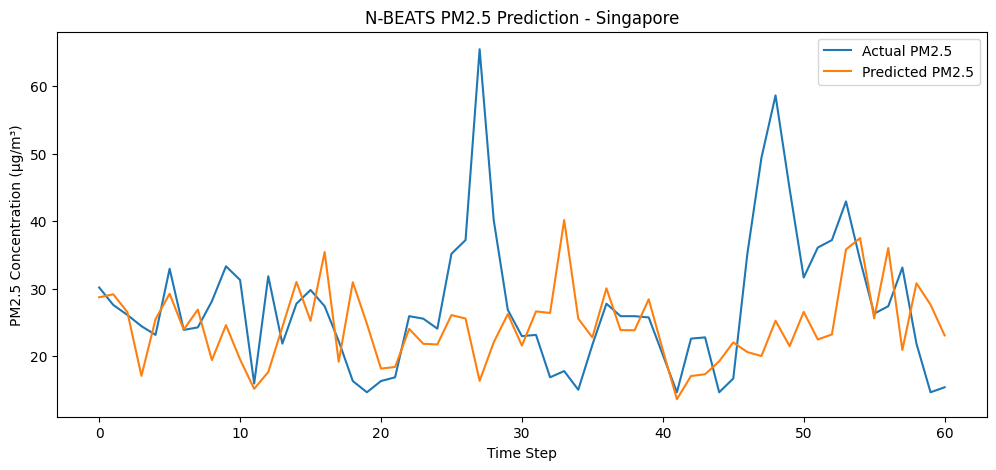

MAE: 7.96
RMSE: 11.87
MAPE: 28.00%


In [57]:
# Step 1: Load and preprocess data
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")
df = df[df["location_name"].str.contains("Singapore", case=False)]

# Step 2: Select relevant features
selected_cols = [
    "temperature_celsius", "humidity", "wind_kph", "precip_mm", "air_quality_PM2.5"
]
df = df[selected_cols].dropna()
df = df.tail(10000)  # Use the latest 10,000 records

# Step 3: Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Step 4: Create sliding windows for time series
def create_sequences(data, sequence_length=24):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length, :-1])  # Features
        y.append(data[i + sequence_length, -1])     # Target: PM2.5
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, sequence_length=24)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 6: Build and train N-BEATS model
model = build_nbeats_model(input_length=X.shape[1], input_dim=X.shape[2])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Inverse transform predictions and actual values
pm25_index = selected_cols.index("air_quality_PM2.5")
pm25_scaler = MinMaxScaler()
pm25_scaler.min_, pm25_scaler.scale_ = scaler.min_[pm25_index], scaler.scale_[pm25_index]
y_test_real = pm25_scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_real = pm25_scaler.inverse_transform(y_pred)

# Step 9: Plot actual vs predicted PM2.5
plt.figure(figsize=(12, 5))
plt.plot(y_test_real, label='Actual PM2.5')
plt.plot(y_pred_real, label='Predicted PM2.5')
plt.title("N-BEATS PM2.5 Prediction - Singapore")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 10: Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
mae = mean_absolute_error(y_test_real, y_pred_real)
mape = np.mean(np.abs((y_test_real - y_pred_real) / y_test_real)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



# Model 6: ARIMA

In [48]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


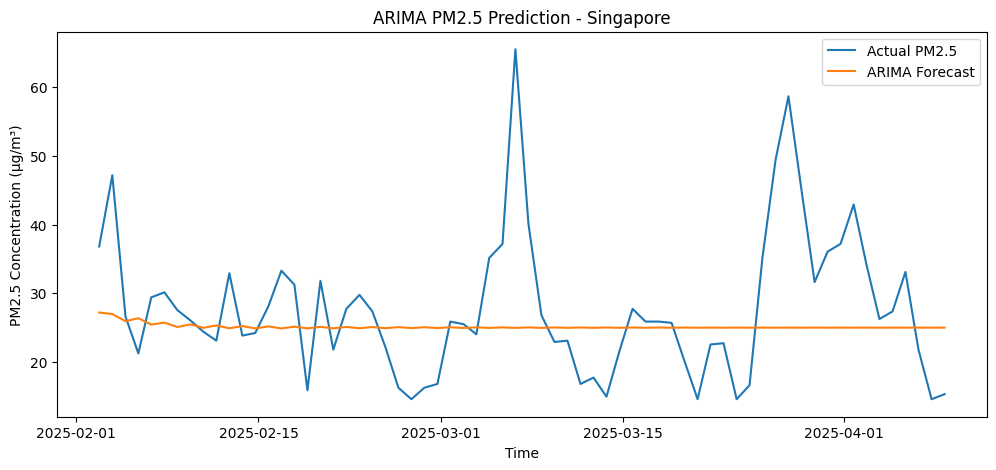

MAE: 7.32
RMSE: 10.43
MAPE: 26.41%


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load and sort data
df = pd.read_csv("GlobalWeatherRepository.csv")
df["last_updated"] = pd.to_datetime(df["last_updated"])
df = df.sort_values("last_updated")

# Step 2: Filter Singapore and select PM2.5 column
df = df[df["location_name"].str.contains("Singapore", case=False)]
df = df[["last_updated", "air_quality_PM2.5"]].dropna()
df = df.tail(10000).reset_index(drop=True)  # Use last 10,000 records

# Step 3: Train-test split
train_size = int(len(df) * 0.8)
train = df["air_quality_PM2.5"][:train_size]
test = df["air_quality_PM2.5"][train_size:]
test_index = df["last_updated"][train_size:]

# Step 4: Fit ARIMA model (adjust p,d,q as needed)
model = ARIMA(train, order=(5, 1, 2))
model_fit = model.fit()

# Step 5: Forecast aligned with test set
start = len(train)
end = len(train) + len(test) - 1
forecast = model_fit.predict(start=start, end=end)

# Step 6: Plot results
plt.figure(figsize=(12, 5))
plt.plot(test_index, test.values, label='Actual PM2.5')
plt.plot(test_index, forecast.values, label='ARIMA Forecast')
plt.title("ARIMA PM2.5 Prediction - Singapore")
plt.xlabel("Time")
plt.ylabel("PM2.5 Concentration (μg/m³)")
plt.legend()
plt.show()

# Step 7: Evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test.values - forecast.values) / test.values)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


# Model 7: SARIMA

In [42]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/Users/xxy/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xxy/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/xxy/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/xxy/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pr

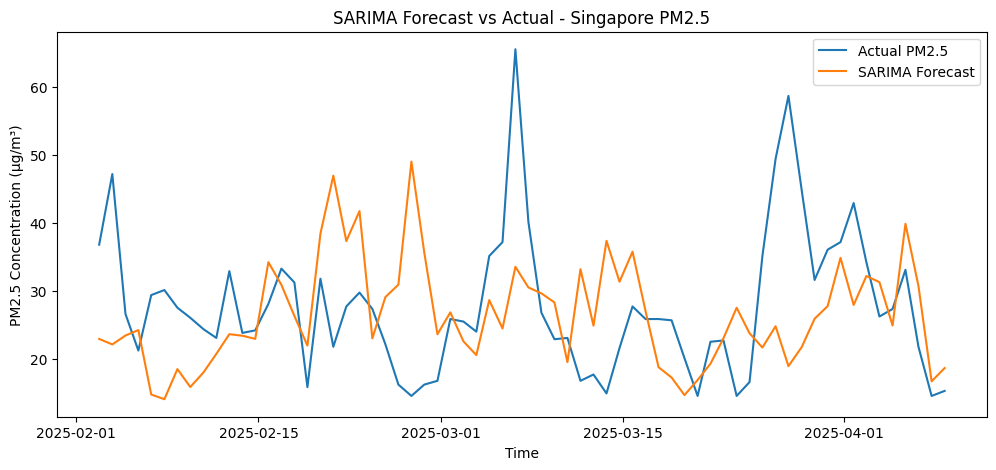

SARIMA - RMSE: 12.71, MAE: 9.51, MAPE: nan%


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=['last_updated'])
df = df[df["location_name"].str.contains("Singapore", case=False)]
df = df[['last_updated', 'air_quality_PM2.5']].dropna().sort_values('last_updated')

# Use time as index
df.set_index('last_updated', inplace=True)

# Optionally downsample if needed (e.g., to hourly or daily)
# df = df.resample('1H').mean().dropna()

# Split into train/test
train_size = int(len(df) * 0.8)
train, test = df['air_quality_PM2.5'][:train_size], df['air_quality_PM2.5'][train_size:]

# Fit SARIMA model
# SARIMA(p,d,q)(P,D,Q,s), s = 60 assumed as approximate hourly periodicity
model = SARIMAX(train,
                order=(2, 1, 2),
                seasonal_order=(1, 1, 1, 60),  # Adjust '60' based on your sampling frequency
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100


# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual PM2.5')
plt.plot(test.index, forecast.values, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual - Singapore PM2.5')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.legend()
plt.show()

print(f'SARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


# Model 8 ：Prophet

In [54]:
pip install prophet


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


20:23:59 - cmdstanpy - INFO - Chain [1] start processing
20:23:59 - cmdstanpy - INFO - Chain [1] done processing


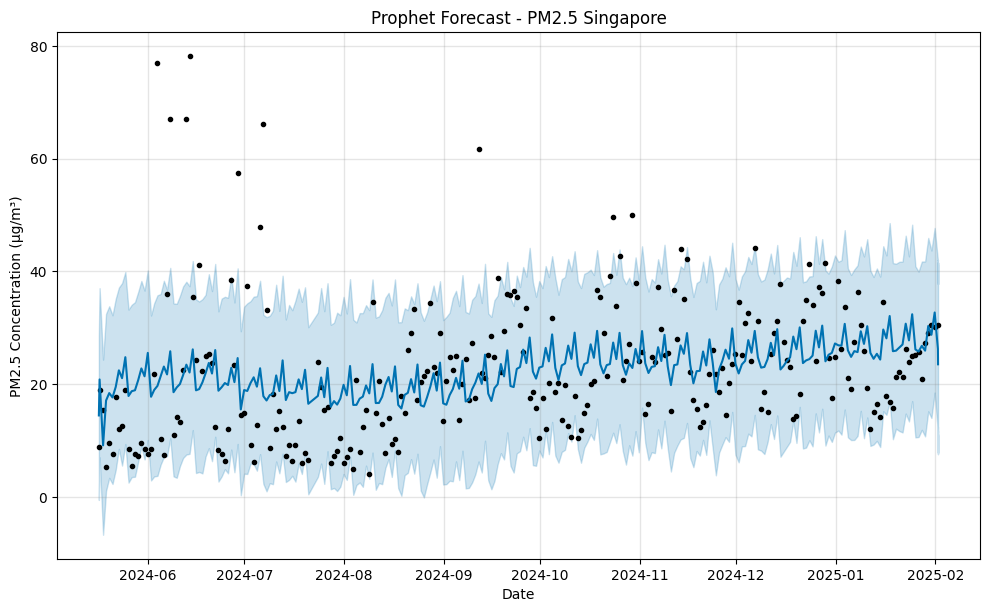

Prophet - RMSE: 10.67, MAE: 7.41, MAPE: nan%


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Load and prepare the data
df = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=['last_updated'])
df = df[df["location_name"].str.contains("Singapore", case=False)]
df = df[['last_updated', 'air_quality_PM2.5']].dropna().sort_values('last_updated')

# Step 2: Rename columns for Prophet
df_prophet = df.rename(columns={'last_updated': 'ds', 'air_quality_PM2.5': 'y'})

# Step 3: Train-test split
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

# Step 4: Fit Prophet model
model = Prophet()
model.fit(train_df)

# Step 5: Forecast
future = model.make_future_dataframe(periods=len(test_df), freq='min')  # 'min' if original data is minute-level
forecast = model.predict(future)

# Step 6: Plot forecast
model.plot(forecast)
plt.title('Prophet Forecast - PM2.5 Singapore')
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.show()

# Step 7: Extract predicted vs actual and evaluate
pred = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test_df):]
actual = test_df.set_index('ds')

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
mae = mean_absolute_error(actual['y'], pred['yhat'])
mape = np.mean(np.abs((actual['y'] - pred['yhat']) / actual['y'])) * 100

print(f'Prophet - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


# Model 9 ：XGboost

In [46]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
import xgboost as xgb
print(xgb.__version__)


2.1.4


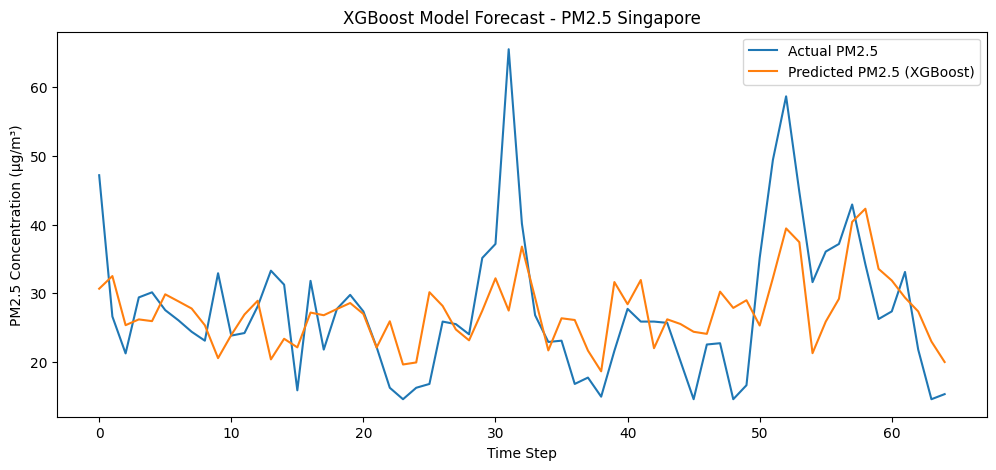

XGBoost - RMSE: 8.66, MAE: 6.31, MAPE: 24.08%


In [66]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load and preprocess data
df = pd.read_csv("GlobalWeatherRepository.csv", parse_dates=['last_updated'])
df = df[df["location_name"].str.contains("Singapore", case=False)]
df = df[['last_updated', 'air_quality_PM2.5']].dropna().sort_values('last_updated')

# Step 2: Create lag features and time-based features
df['lag_1'] = df['air_quality_PM2.5'].shift(1)
df['lag_3'] = df['air_quality_PM2.5'].shift(3)
df['lag_6'] = df['air_quality_PM2.5'].shift(6)

df['dayofweek'] = df['last_updated'].dt.dayofweek
df['hour'] = df['last_updated'].dt.hour  # If your data is minute-level or hourly

df = df.dropna()

# Step 3: Define features and target
features = ['lag_1', 'lag_3', 'lag_6', 'dayofweek', 'hour']
target = 'air_quality_PM2.5'

X = df[features]
y = df[target]

# Step 4: Train-test split
train_size = int(len(X) * 0.8)
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

# Step 5: Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

# Step 6: Predict
y_pred = model.predict(X_val)

# Step 7: Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100

# Step 8: Visualization
plt.figure(figsize=(12, 5))
plt.plot(y_val.values, label='Actual PM2.5')
plt.plot(y_pred, label='Predicted PM2.5 (XGBoost)')
plt.title('XGBoost Model Forecast - PM2.5 Singapore')
plt.xlabel('Time Step')
plt.ylabel('PM2.5 Concentration (μg/m³)')
plt.legend()
plt.show()

# Step 9: Print metrics
print(f'XGBoost - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


# Deep Learning Model
#### Model 1
#### LSTM - 
MAE: 8.28
RMSE: 11.35
MAPE: 28.76%
#### Model 2
#### GRU - 
MAE: 7.55
RMSE: 10.46
MAPE: 27.54%
#### Model 3
#### Transformer - 
MAE: 8.00
RMSE: 11.44
MAPE: 26.61%
#### Model 4
#### TCN - 
MAE: 9.14
RMSE: 11.42
MAPE: 40.70%

#### Model 5
#### N-BEATS - 
MAE: 7.96
RMSE: 11.87
MAPE: 28.00%

# Classical Model
#### Model 6
#### ARIMA - 
MAE: 7.32
RMSE: 10.43
MAPE: 26.41%
#### Model 7
#### SARIMA - 
RMSE: 12.71, MAE: 9.51, MAPE: nan%
#### Model 8
#### Prophet - 
RMSE: 10.67, MAE: 7.41, MAPE: nan%
#### Model 9
#### XGBoost - 
RMSE: 8.66, MAE: 6.31, MAPE: 24.08%